In [1]:
import pandas as pd
import numpy as np
import sys

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../data')

# Exploring data: train, test files.

In [3]:
# Remember to change directory path
train = pd.read_csv("C:/Users/HP/charles/capacitaciones/method data science/Kaggle/newton/data/train.csv", parse_dates=['first_active_month'])
test = pd.read_csv("C:/Users/HP/charles/capacitaciones/method data science/Kaggle/newton/data/test.csv", parse_dates=['first_active_month'])
print(train.shape)
print(test.shape)

(201917, 6)
(123623, 5)


In [4]:
data = pd.concat([train,test])
print(data.head(5))

           card_id  feature_1  feature_2  feature_3 first_active_month  \
0  C_ID_92a2005557          5          2          1         2017-06-01   
1  C_ID_3d0044924f          4          1          0         2017-01-01   
2  C_ID_d639edf6cd          2          2          0         2016-08-01   
3  C_ID_186d6a6901          4          3          0         2017-09-01   
4  C_ID_cdbd2c0db2          1          3          0         2017-11-01   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
data.dtypes

card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
first_active_month    datetime64[ns]
target                       float64
dtype: object

In [6]:
data.describe()

,feature_1,feature_2,feature_3,target
count,325540.00000,325540.000000,325540.000000,201917.000000
mean,3.10681,1.744038,0.565116,-0.393636
std,1.18728,0.750540,0.495742,3.850500
min,1.00000,1.000000,0.000000,-33.219281
25%,2.00000,1.000000,0.000000,-0.883110
50%,3.00000,2.000000,1.000000,-0.023437
75%,4.00000,2.000000,1.000000,0.765453
max,5.00000,3.000000,1.000000,17.965068


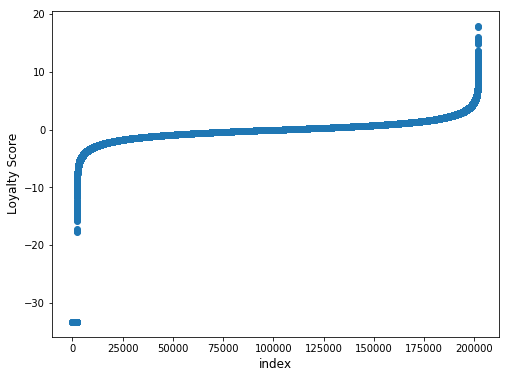

In [7]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

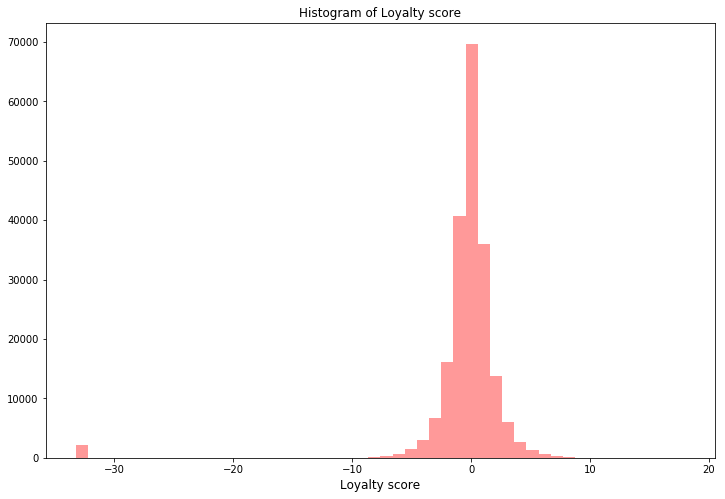

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(train[target_col].values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

In [9]:
(train['target']<-30).sum()

2207

Check out this 2207 input values that might be either outliers or erros. Take them into consideration.

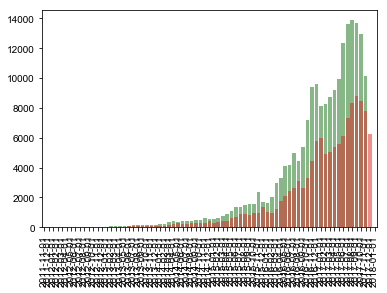

In [10]:
cnt_srs_1 = train['first_active_month'].dt.date.value_counts()
cnt_srs_1 = cnt_srs_1.sort_index()
cnt_srs_2 = test['first_active_month'].dt.date.value_counts()
cnt_srs_2 = cnt_srs_2.sort_index()

sns.barplot(cnt_srs_1.index, cnt_srs_1.values, alpha = 0.5, color = 'green')
sns.barplot(cnt_srs_2.index, cnt_srs_2.values, alpha = 0.5, color = 'red')
#plt.bar(cnt_srs_1.index, cnt_srs_1.values, alpha = 0.5, color = 'green')
#plt.bar(cnt_srs_2.index, cnt_srs_2.values, alpha = 0.5, color = 'red')

plt.xticks(rotation = 'vertical')
#plt.xlabel('First active month', fontsize=12)
#plt.ylabel('Number of cards', fontsize=12)
#plt.title("First active month count in train set")

sns.set(rc={'figure.figsize':(14, 6)})

plt.show()

In [11]:
print(data.feature_1.unique())

[5 4 2 1 3]


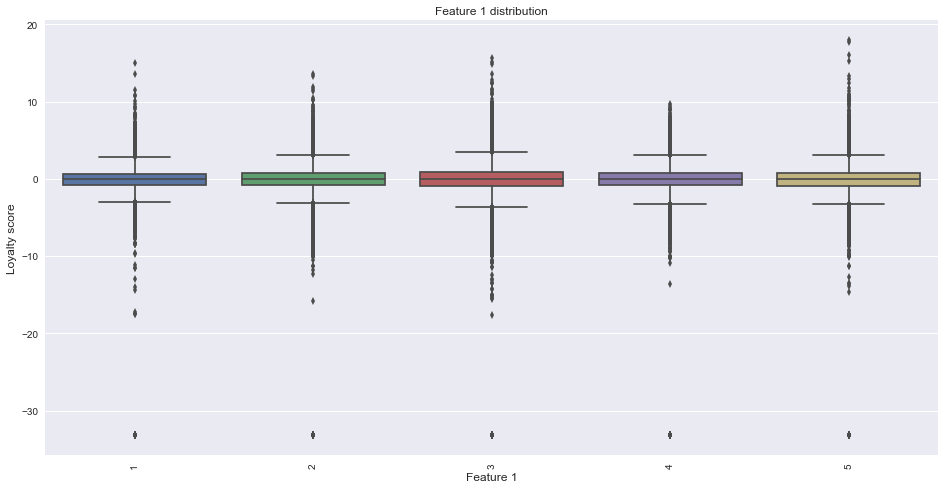

In [12]:
# feature 1
plt.figure(figsize=(16,8))
sns.boxplot(x="feature_1", y=data.target, data=data)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

In [13]:
print(data.feature_2.unique())

[2 1 3]


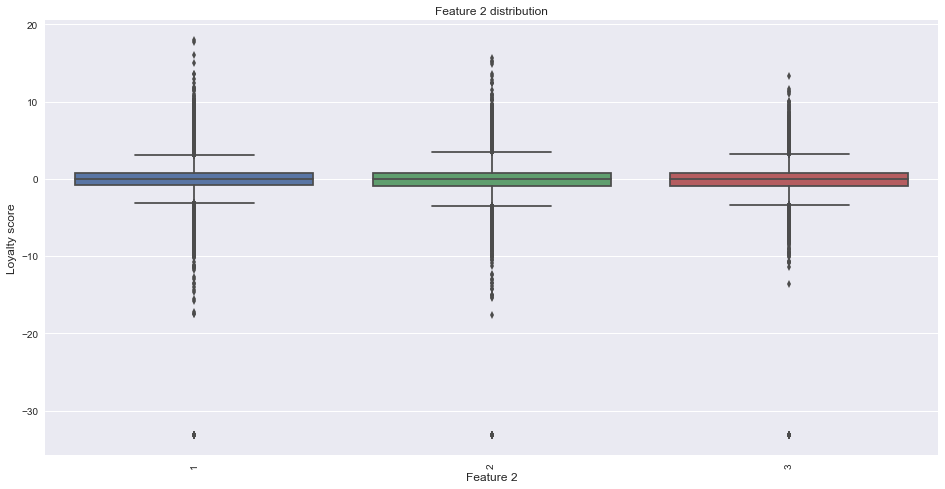

In [14]:
# feature 2
plt.figure(figsize=(16,8))
sns.boxplot(x="feature_2", y=data.target, data=data)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

In [15]:
print(data.feature_3.unique())

[1 0]


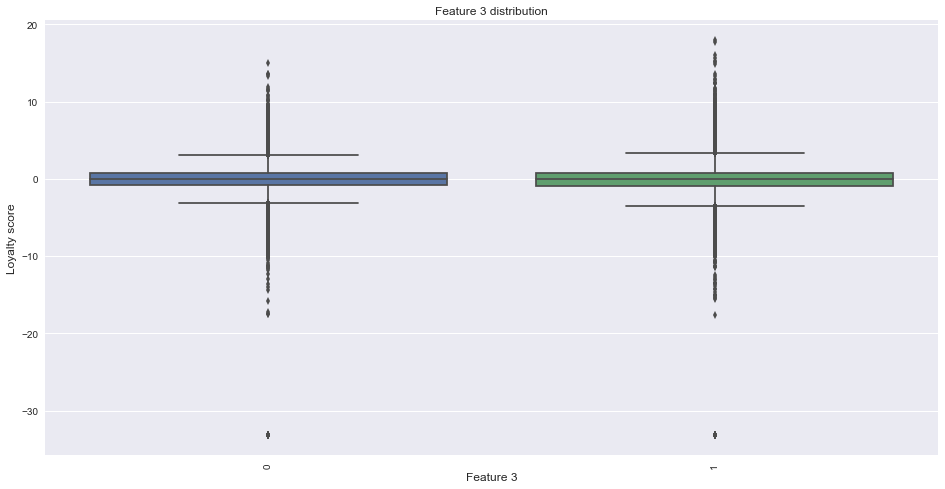

In [16]:
# feature 3
plt.figure(figsize=(16,8))
sns.boxplot(x="feature_3", y=data.target, data=data)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

# Exploring data: historical_transactions file.

In [17]:
hist = pd.read_csv('C:/Users/HP/charles/capacitaciones/method data science/Kaggle/newton/data/historical_transactions.csv')

In [18]:
hist.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [19]:
hist.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [20]:
# Number of historical transactiones for each card_id
gdf = hist.groupby('card_id')
#print(gdf.head(5))

gdf = gdf['purchase_amount'].size().reset_index()
print(gdf.head(5))

gdf.columns = ['card_id', 'num_hist_transactions']
train = pd.merge(train, gdf, on='card_id', how='left')
test = pd.merge(test, gdf, on='card_id', how='left')
data = pd.merge(data, gdf, on='card_id', how='left')
print(data.head(5))

           card_id  purchase_amount
0  C_ID_00007093c1              149
1  C_ID_0001238066              123
2  C_ID_0001506ef0               66
3  C_ID_0001793786              216
4  C_ID_000183fdda              144
           card_id  feature_1  feature_2  feature_3 first_active_month  \
0  C_ID_92a2005557          5          2          1         2017-06-01   
1  C_ID_3d0044924f          4          1          0         2017-01-01   
2  C_ID_d639edf6cd          2          2          0         2016-08-01   
3  C_ID_186d6a6901          4          3          0         2017-09-01   
4  C_ID_cdbd2c0db2          1          3          0         2017-11-01   

     target  num_hist_transactions  
0 -0.820283                    260  
1  0.392913                    350  
2  0.688056                     43  
3  0.142495                     77  
4 -0.159749                    133  


In [21]:
train.dtypes

first_active_month       datetime64[ns]
card_id                          object
feature_1                         int64
feature_2                         int64
feature_3                         int64
target                          float64
num_hist_transactions             int64
dtype: object

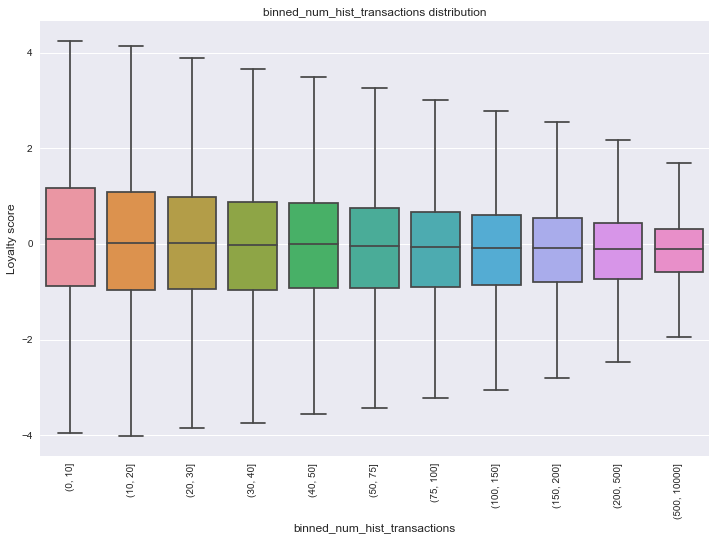

In [22]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
train['binned_num_hist_transactions'] = pd.cut(train['num_hist_transactions'], bins)
cnt_srs = train.groupby("binned_num_hist_transactions")['target'].mean()

plt.figure(figsize=(12,8))
sns.boxplot(x="binned_num_hist_transactions", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_num_hist_transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("binned_num_hist_transactions distribution")
plt.show()

In [23]:
train.dtypes

first_active_month              datetime64[ns]
card_id                                 object
feature_1                                int64
feature_2                                int64
feature_3                                int64
target                                 float64
num_hist_transactions                    int64
binned_num_hist_transactions          category
dtype: object

## Historical transactions, aggregated by different indicators

In [24]:
gdf = hist.groupby("card_id")
gdf = gdf["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
gdf.columns = ["card_id", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", "min_hist_trans", "max_hist_trans"]
train = pd.merge(train, gdf, on="card_id", how="left")
test = pd.merge(test, gdf, on="card_id", how="left")

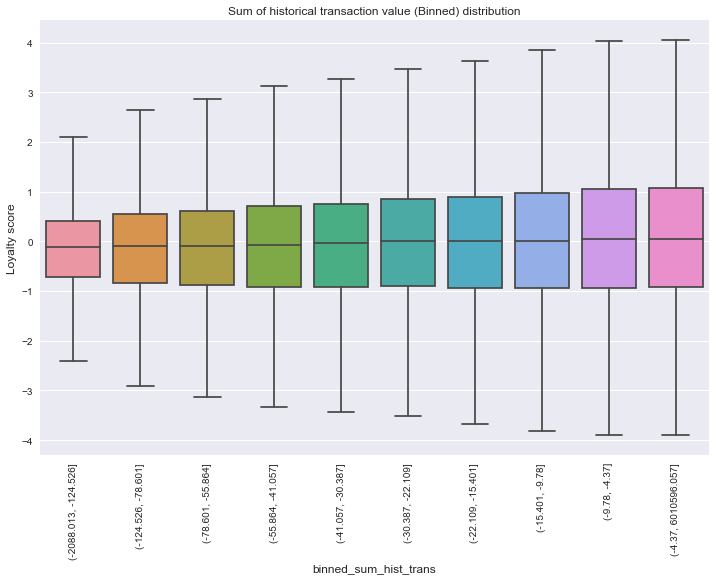

In [25]:
bins = np.percentile(train["sum_hist_trans"], range(0,101,10))
train['binned_sum_hist_trans'] = pd.cut(train['sum_hist_trans'], bins)
#cnt_srs = train_df.groupby("binned_sum_hist_trans")[target_col].mean()

plt.figure(figsize=(12,8))
sns.boxplot(x="binned_sum_hist_trans", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_sum_hist_trans', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Sum of historical transaction value (Binned) distribution")
plt.show()

In [26]:
train.target

0        -0.820283
1         0.392913
2         0.688056
3         0.142495
4        -0.159749
5         0.871585
6         0.230129
7         2.135850
8        -0.065406
9         0.300062
10       -1.029562
11       -2.433761
12        1.304452
13        0.093633
14        1.597750
15        1.010937
16        1.132236
17        0.318062
18        0.757280
19        0.334337
20        1.442726
21        4.747602
22        0.464404
23       -0.529658
24       -0.084951
25        1.525862
26       -0.090744
27       -1.361720
28        0.727093
29        1.143863
            ...   
201887    0.193238
201888    0.076491
201889   -0.024215
201890    0.666202
201891   -1.327112
201892    0.130062
201893    1.047496
201894   -0.882748
201895   -0.549372
201896   -0.616658
201897   -0.133215
201898   -3.360124
201899   -2.702214
201900   -0.151734
201901   -1.743145
201902    1.001529
201903    0.251799
201904   -0.401386
201905    1.182343
201906    0.279741
201907    0.145590
201908    0.

# Exploring data: new_merchants_transactions file.

In [27]:
new_trans = pd.read_csv("C:/Users/HP/charles/capacitaciones/method data science/Kaggle/newton/data/new_merchant_transactions.csv")

In [28]:
new_trans.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [29]:
new_trans.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [30]:
gdf = new_trans.groupby("card_id")
gdf = gdf["purchase_amount"].size().reset_index()
gdf.columns = ["card_id", "num_merch_transactions"]
train = pd.merge(train, gdf, on="card_id", how="left")
test = pd.merge(test, gdf, on="card_id", how="left")

In [31]:
train.dtypes

first_active_month              datetime64[ns]
card_id                                 object
feature_1                                int64
feature_2                                int64
feature_3                                int64
target                                 float64
num_hist_transactions                    int64
binned_num_hist_transactions          category
sum_hist_trans                         float64
mean_hist_trans                        float64
std_hist_trans                         float64
min_hist_trans                         float64
max_hist_trans                         float64
binned_sum_hist_trans                 category
num_merch_transactions                 float64
dtype: object

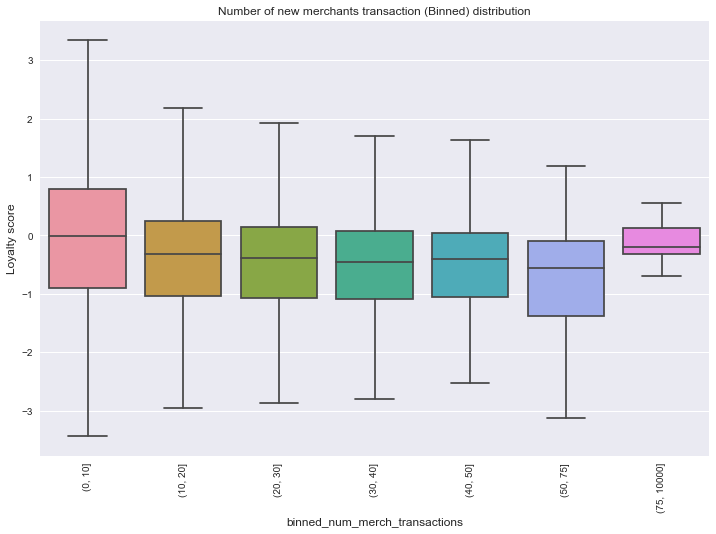

In [32]:
bins = [0, 10, 20, 30, 40, 50, 75, 10000]
train['binned_num_merch_transactions'] = pd.cut(train['num_merch_transactions'], bins)
cnt_srs = train.groupby("binned_num_merch_transactions")['target'].mean()

plt.figure(figsize=(12,8))
sns.boxplot(x="binned_num_merch_transactions", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_num_merch_transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Number of new merchants transaction (Binned) distribution")
plt.show()

In [33]:
gdf = new_trans.groupby("card_id")
gdf = gdf["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
gdf.columns = ["card_id", "sum_merch_trans", "mean_merch_trans", "std_merch_trans", "min_merch_trans", "max_merch_trans"]
train = pd.merge(train, gdf, on="card_id", how="left")
test = pd.merge(test, gdf, on="card_id", how="left")

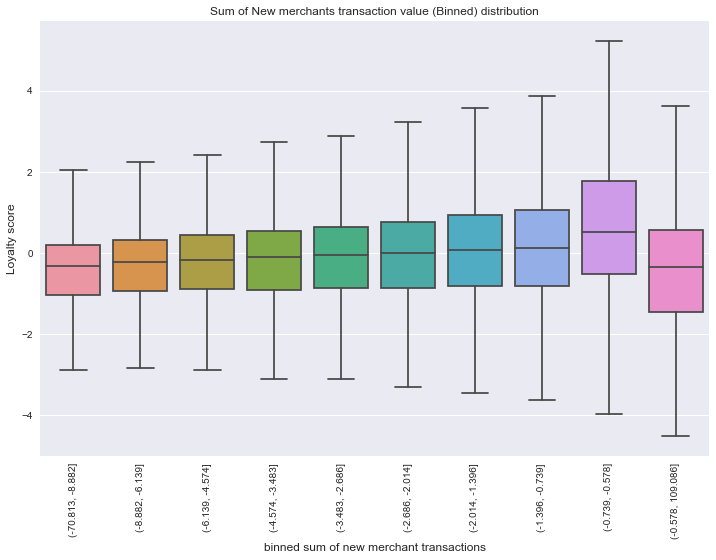

In [35]:
bins = np.nanpercentile(train["sum_merch_trans"], range(0,101,10))
train['binned_sum_merch_trans'] = pd.cut(train['sum_merch_trans'], bins)
#cnt_srs = train_df.groupby("binned_sum_hist_trans")[target_col].mean()

plt.figure(figsize=(12,8))
sns.boxplot(x="binned_sum_merch_trans", y='target', data=train, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned sum of new merchant transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Sum of New merchants transaction value (Binned) distribution")
plt.show()

# Baseline: minable view

In [47]:
train["year"] = train["first_active_month"].dt.year
test["year"] = test["first_active_month"].dt.year
train["month"] = train["first_active_month"].dt.month
test["month"] = test["first_active_month"].dt.month

cols_to_use = ["feature_1", "feature_2", "feature_3", "year", "month", 
               "num_hist_transactions", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", 
               "min_hist_trans", "max_hist_trans",
               "num_merch_transactions", "sum_merch_trans", "mean_merch_trans", "std_merch_trans",
               "min_merch_trans", "max_merch_trans",
              ]


train_X = train[cols_to_use]
test_X = test[cols_to_use]
train_y = train['target'].values

print('Train_X: \n')
print(train_X.head(5))
print('-----------------------------------------------------------------------------')
print('Test_X: \n')
print(test_X.head(5))
print('-----------------------------------------------------------------------------')
print('Train_y: \n')
print(train_y[:5])

Train_X: 

   feature_1  feature_2  feature_3  year  month  num_hist_transactions  \
0          5          2          1  2017      6                    260   
1          4          1          0  2017      1                    350   
2          2          2          0  2016      8                     43   
3          4          3          0  2017      9                     77   
4          1          3          0  2017     11                    133   

   sum_hist_trans  mean_hist_trans  std_hist_trans  min_hist_trans  \
0     -165.968739        -0.638341        0.212139       -0.739395   
1     -210.006336        -0.600018        0.384967       -0.742400   
2      -29.167391        -0.678311        0.087380       -0.730138   
3      -49.491364        -0.642745        0.261624       -0.740897   
4      -48.687656        -0.366073        1.352094       -0.746156   

   max_hist_trans  num_merch_transactions  sum_merch_trans  mean_merch_trans  \
0        2.258395                    23.0  